# Définition du Problème

Il est question dans ce modèle d'apprentissage de predire si l'objet rencontré par un sonar sous marin actif est une 
mine ou une Roche.<br> 
En effet, le sonar va envoyer dans l'eau une energie élètrique qui sera transformée en onde sonore. Si cette onde 
rencontre un objet, elle rebondit puis captée par le sonar qui va la retransformée en energie élètrique(Signal élèctrique).<br> 
Nous obtenons donc des observations correspondantes à l'intensité du signal éléctrique réçu dans une bande de frequence 
sonore particulière. 

In [103]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Acquisition des données

In [116]:
observations = pd.read_csv("./datas/sonar.all-data.csv")
observations.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


Le dataset n'a pas de nom de colonne. Rectifions cela

In [118]:
observations = pd.read_csv("C:/Users/Andreas/PycharmProjects/SONAR_ONDE/datas/sonar.all-data.csv", names=["F1", "F2", "F3"
                , "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19"
                , "F20", "F21", "F22", "F23", "F24", "F25", "F26", "F27", "F28", "F29", "F30", "F31", "F32", "F33", "F34"
                , "F35", "F36", "F37", "F38", "F39", "F40", "F41", "F42", "F43", "F44", "F45", "F46", "F47", "F48", "F49"
                , "F50", "F51", "F52", "F53", "F54", "F55", "F56", "F57", "F58", "F59", "F60", "OBJET"])

observations.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F52,F53,F54,F55,F56,F57,F58,F59,F60,OBJET
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Préparation des données

In [105]:
observations.shape

(208, 61)

In [106]:
#Données manquantes?
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
F1       208 non-null float64
F2       208 non-null float64
F3       208 non-null float64
F4       208 non-null float64
F5       208 non-null float64
F6       208 non-null float64
F7       208 non-null float64
F8       208 non-null float64
F9       208 non-null float64
F10      208 non-null float64
F11      208 non-null float64
F12      208 non-null float64
F13      208 non-null float64
F14      208 non-null float64
F15      208 non-null float64
F16      208 non-null float64
F17      208 non-null float64
F18      208 non-null float64
F19      208 non-null float64
F20      208 non-null float64
F21      208 non-null float64
F22      208 non-null float64
F23      208 non-null float64
F24      208 non-null float64
F25      208 non-null float64
F26      208 non-null float64
F27      208 non-null float64
F28      208 non-null float64
F29      208 non-null float64
F30      208 non-null flo

Interpretation<br> 
Nous n'observons aucune donnée manquante et toutes nos données sont des valeurs numériques continues à l'exception de la valeur cible.

# Feature engineering

In [107]:
observations.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Nous observons que nous que pour chacune de nos valeurs, une moyenne qui tend vers zero et un écart type tendant vers 1.
Nous pouvons dire que nos données sont normalisées. Ce qui rend notre jeu d'obervation propice à l'utilisation des <b> ANN(Artificial Neural Network).<b> 

Analysons notre variable de categorisation <b>(OBJET)</b>

Text(0, 0.5, 'Count')

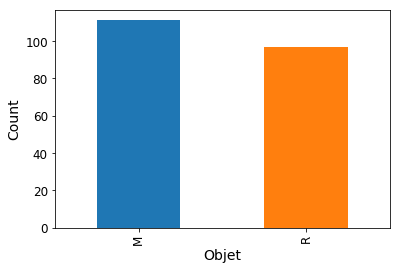

In [108]:
observations.OBJET.value_counts().plot.bar()
plt.xlabel('Objet')
plt.ylabel('Count')

Nous remarquons la légère difference existante entre ces deux valeurs. Par conséquent nous pouvons l'utiliser(jeu observations) sans craindre d'impacter notre modèle d'apprentissage.
Nous allons à présent verifier l'existence des valeurs extrêmes qui éventuellement peuvent conduire à des mauvaises 
prédictions

### Selection des variables

In [109]:
X = observations.iloc[:,0:60].values

Y = observations.iloc[:,-1].values
#X = observations[observations.columns[0:60]].values

Transformons la variable categorielle

In [110]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#La feature 'OBJET' represente notre varaible expliqéé et est de type categorielle, On va donc l'encoder entierement 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
#Une fois l'encodage entier effectué, tranformons notre variable en vectuer binaire afin d'indentifier les etiquettes
oneHot_encoder = OneHotEncoder()
Y = oneHot_encoder.fit_transform(Y.reshape(-1,1)).toarray()

In [111]:
#Création des jeux d'apprentissage et de test
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_validation[1].shape

(2,)

## Phase d'apprentissage

### Configuration du réseau de neuronnes

4.5455465


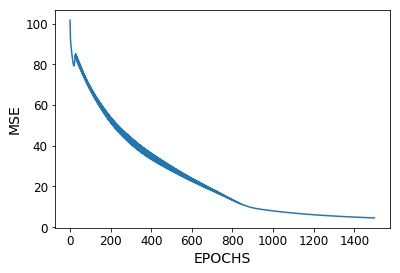

In [112]:
#Parametrage de notre réseaux de neurones

#Variables correspondantes aux valeurs de neurones d'entrée
neurones_entrees = tf.placeholder(tf.float32, [None,60])

#Variables de sortie
neurones_sorties = tf.placeholder(tf.float32, [None,2])

#Poids neurones de la couche cachée
poids = {
    #Poids neurones d'entrées vers la couche cachée
    'couche_entree_vers_cachee':tf.Variable(tf.random_normal([60,24]), tf.float32),
    #Poids neurones cochée vers couche de sortie
    'couche_cachee_vers_sortie':tf.Variable(tf.random_normal([24,2]), tf.float32)
}
biais = {
    'biais_couche_entree': tf.Variable(tf.zeros([24]), tf.float32),
    'biais_couche_cachee': tf.Variable(tf.zeros([2]), tf.float32)
}

#Calcul de la somme ponderee
def activation_neuronnes(neurones_entrees,poids,biais):
    #Activation de la couche cachée
    sommeponderee = tf.sigmoid(tf.matmul(neurones_entrees,poids['couche_entree_vers_cachee']) + biais['biais_couche_entree'])
    activation = tf.sigmoid(tf.matmul(sommeponderee,poids['couche_cachee_vers_sortie'])+biais['biais_couche_cachee'])
    return activation
activation = activation_neuronnes(neurones_entrees,poids,biais)

#Fonction d'erreur
error = tf.reduce_sum(tf.pow(neurones_sorties-activation,2))

#Descente de gradient
optimisation = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(error)

#Apprentissage de reseau de neuronnes

#Initialaisation des variables
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

EPOCHS = 1500
Graphics_MSE = []

for i in range(EPOCHS):
    session.run(optimisation, feed_dict={neurones_entrees:X_train,neurones_sorties:Y_train })
    
    MSE = session.run(error, feed_dict={neurones_entrees:X_train,neurones_sorties:Y_train})
    Graphics_MSE.append(MSE)
    
print(MSE)
plt.plot(Graphics_MSE)
plt.xlabel('EPOCHS')
plt.ylabel('MSE')
plt.show()

## Calculons la précision sur les données de test

In [113]:
#Calcul de la precision de notre modele sur les données de test

#On recupère l'index de classification la plus haute
classifications = tf.argmax(activation,1)

#On compare les classifications réalisées avec celles attendues
comparaison_classification = tf.equal(classifications, tf.argmax(neurones_sorties,1))

#On calcul la moyenne des bonnes classifications
#Sachant que la fonction tf.equal renvoie des booleans, nous allons caster ce output
formule_precision = tf.reduce_mean(tf.cast(comparaison_classification, tf.float32))

#Debut de notre algorithme
#Nous allons calculer le pourcentage de bonne clasifications
nb_classifications = 0
nb_bonne_classification = 0

for i in range(X_validation.shape[0]):
    #On reformate chaque donnée d'entrée et de sortie
    donneesolar =  X_validation[i].reshape(1,60)
    classificationAttendue = Y_validation[i].reshape(1,2)
    
    #On recupère l'index de la bonne classification
    index_bonne_classification = session.run(classifications, feed_dict={neurones_entrees:donneesolar})
    
    #On calcule la moyenne de la classification
    moyenne_classification = session.run(formule_precision, feed_dict={neurones_entrees:donneesolar, 
                                                                       neurones_sorties:classificationAttendue})
    
    #On affiche nos résultats
    classe_attendue = tf.argmax(classificationAttendue,1)
    index_classe_attendue = session.run(classe_attendue, feed_dict={neurones_sorties:classificationAttendue})
    
    print("Classification Attendue: "+str(index_classe_attendue)+" classe réalisée:"+str(index_bonne_classification))
    nb_classifications = nb_classifications+1
    
    if (moyenne_classification*100 == 100):
            nb_bonne_classification = nb_bonne_classification+1
            
print('Precision sur mes données de test:'+str(nb_bonne_classification/nb_classifications))


Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [1] classe réalisée:[1]
Classification Attendue: [1] classe réalisée:[1]
Classification Attendue: [1] classe réalisée:[1]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [1] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [1] classe réalisée:[1]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [1] classe réalisée:[1]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [0] classe réalisée:[0]
Classification Attendue: [1] classe réalisée:[0]
Classification Attendue: [1] classe réalisée:[1]
Classification Atten

In [114]:
#Precison sur mes données d'apprentissage
nb_classification = 0
nb_bonnes_classifications = 0
for i in range(X_train.shape[0]):
    #On reformate chaque donnée d'entrée et de sortie
    donneesolaire =  X_train[i].reshape(1,60)
    classificationAttendu = Y_train[i].reshape(1,2)
    
    #On recupère l'index de la bonne classification
    index_bonn_classification = session.run(classifications, feed_dict={neurones_entrees:donneesolaire})
    
    #On calcule la moyenne de la classification
    mean_classification = session.run(formule_precision, feed_dict={neurones_entrees:donneesolaire, 
                                                                       neurones_sorties:classificationAttendu})
    nb_classification = nb_classification+1
    #On affiche nos résultats
    if (mean_classification*100 == 100):
            nb_bonnes_classifications = nb_bonnes_classifications+1
            
print('Precision sur mes données d\'apprentissage: '+str(nb_bonnes_classifications/nb_classification))

Precision sur mes données d'apprentissage: 0.9939759036144579
